In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [3]:
#fetching data
url=r'https://www.pakwheels.com/used-cars/search/-/'
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'}
response= requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
Cars= soup.find_all('a',{'class':'car-name ad-detail-path'})
prices=soup.find_all('div',{'class':'price-details generic-dark-grey'})

In [5]:
#opening file 
file= r'D:\Carsdata.xlsx'
#Saving data on excel
data=[]
for i in range(len(Cars)):
    carlst=Cars[i].text.replace('for Sale','').strip() #removing extra varables
    price=float((prices[i].text.strip().replace('lacs','') if 'lacs' in prices[i].text else prices[i].text.strip().replace('crore','')).replace('PKR','').replace('\n',''))*100000
    data.append([i+1,carlst,price])
df= pd.DataFrame(data=data, columns=['S.NO#','CARS','PRICE  IN PKR'])
df.to_excel(file)

In [8]:
#loan Calculator
class CarLoan:
    def __init__(self,Sno,downpay):
        self.Sno=Sno-1
        self.downpay=downpay
        self.intialprice=float(df.at[self.Sno,"PRICE  IN PKR"])
    
    def calculation(self):
        self.loan=(100-self.downpay)/100
        self.interest=self.loan/10
        self.total=self.loan*self.intialprice+(self.interest*self.intialprice)
        self.Chart()
    def Chart(self):
        #creating chart
        loan=self.loan*100
        interest=self.interest*100
        paying=self.intialprice*(self.downpay/100)
        #print(loan, interest)
        values=[loan,interest,self.downpay]
        label=['Loan' ,'Interest','Amount Paying '+str(paying)]
        exp=[0.2,0.1,0]
        cl= ['#F67280', '#6C5B7B', '#355C7D']
        plt.pie(values, labels=label, explode=exp,autopct='%2.2f%%', colors=cl)
        plt.title("Total Amount OF CAR RS. {:.2f}".format(self.total),bbox={'facecolor':'0.9'})
        plt.show()

In [9]:
#displaying data
df= pd.read_excel(file, index_col=0)
df.head(10)

,S.NO#,CARS,PRICE IN PKR
0,1,Toyota C-HR 2017,6700000
1,2,Nissan Dayz 2019 S,2425000
2,3,Mercedes Benz E Class 2009 E300,7650000
3,4,Toyota Corolla 2012 GLi 1.3 VVTi,2050000
4,5,Honda CR-Z Sports Hybrid 2011 Base Grade (Met...,2800000
5,6,KIA Sportage 2021 Alpha,5150000
6,7,Toyota Hilux 2005 D-4D Automatic,4200000
7,8,Toyota Prado 90 Series 1997 TZ 3.0D,3600000
8,9,Suzuki Aerio 2011,1700000
9,10,Honda City 2015 1.3 i-VTEC Prosmatec,2200000


Enter Serial Number of Car(1/30)7
Enter The Downpayment=(10-100)% 30


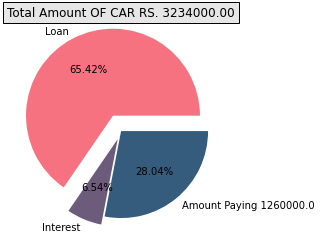

In [10]:
#Driver's Code
p1=CarLoan(int(input('Enter Serial Number of Car(1/30)')),int(input("Enter The Downpayment=(10-100)% ")))
p1.calculation()